In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 16 20:23:07 2021

@author: gansa001
"""
from sympy import *
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Write a computer program to calculate the Lagrange interpolation polynomial Pn(x) to f(x) such that: Pn(xj)=f(xj)  j=0,1,2,……,n


In [2]:
def delta(j,a,x,N):
    '''
    Parameters
    ----------
    j : int. 
        the jth lagrange polynomial
    a : sympy symbol
        the dependent term in the lagrange polynomial
    x : list
        x values from the original function
    N : int

    Returns
    -------
    The lagrange polynomial for any given j

    '''
    num=1
    den=1
    for i in range(N):
        if i!=j:
            num*=(a-x[i])
            den*=(x[j]-x[i])
    return (num/den)

def Lagrange(x,y):
    '''

    Parameters
    ----------
    x : list
        dependent variable values
    y : list
        independent variable values

    Returns
    -------
    f: The lagrangian approximation of the function

    '''
    N=len(x)
    a=Symbol('a')
    f=0
    for j in range(len(x)):
        answer= (delta(j,a,x,N))
        f+=y[j]*answer
    return (simplify(f))

#### a)	Apply it to some elementary functions or discrete data sets.

In [3]:
'''
Exponential function from range -1 to 1 and 3 points to confirm the values from class. 
'''
x=[-1,0,1]
y=[math.exp(i) for i in x]

print('x = ',x)
print('y = ',y)

x =  [-1, 0, 1]
y =  [0.36787944117144233, 1.0, 2.718281828459045]


In [4]:
##function call
Lagrange(x,y)

0.543080634815244*a**2 + 1.1752011936438*a + 1.0

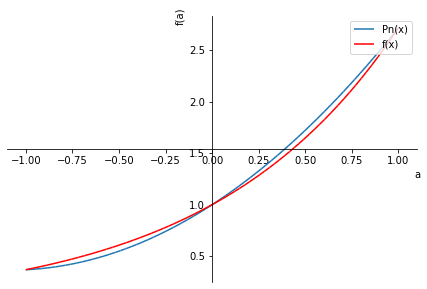

In [5]:
##plotting
a=Symbol('a')

p=plot(Lagrange(x,y), (E**a),(a,-1,1),show=False)
p[1].line_color='r'
p[0].label='Pn(x)'
p[1].label='f(x)'
p.legend=True
p.show()

In [6]:
'''
Quartic function from range -1 to 1 and 3 points. 
'''
x=[-1,0,1]
y=[i**4 for i in x]

print('x = ',x)
print('y = ',y)

x =  [-1, 0, 1]
y =  [1, 0, 1]


In [7]:
Lagrange(x,y)

a**2

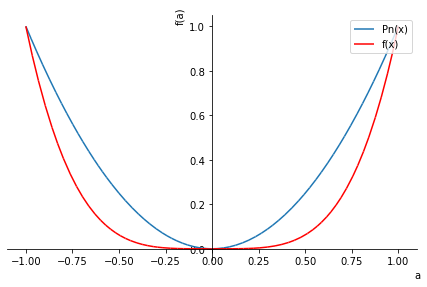

In [8]:
p=plot(Lagrange(x,y), (a**4),(a,-1,1),show=False)
p[1].line_color='r'
p[0].label='Pn(x)'
p[1].label='f(x)'
p.legend=True
p.show()

#### b)	Apply it to function $$ f(x) = \frac{1}{1+25x^2} $$  in the interval [-1,1] with equally spaced interpolation points and n=8, 16, 32.  Plot Pn(x) and f(x) in [-1,1] interval to see the interpolation error. 

********** NUMBER OF POINTS =  8  **********

Lagrange=  -1.37459488236402e-14*a**7 - 5.17359870277278*a**6 + 4.49709713912227e-14*a**5 + 9.07597029572138*a**4 + 1.795438797636e-16*a**3 - 4.61655144792775*a**2 + 2.11640329827317e-15*a + 0.752641393440685


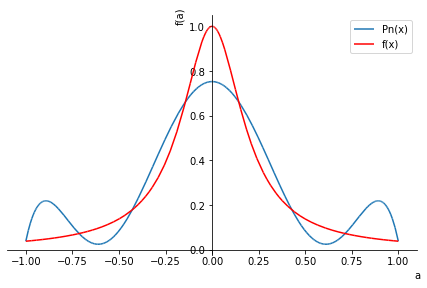




********** NUMBER OF POINTS =  16  **********

Lagrange=  4.54747350886464e-12*a**15 - 1518.86438621445*a**14 - 1.09139364212751e-10*a**13 + 4651.10027600813*a**12 - 5.82076609134674e-10*a**11 - 5570.00947938451*a**10 + 1.85536919161677e-10*a**9 + 3347.68104837762*a**8 - 7.00310920365155e-11*a**7 - 1083.00942611954*a**6 - 3.92219590139575e-12*a**5 + 190.14375628806*a**4 - 5.09814412907872e-13*a**3 - 17.9795744925627*a**2 + 7.18175519054398e-15*a + 0.976247076344098


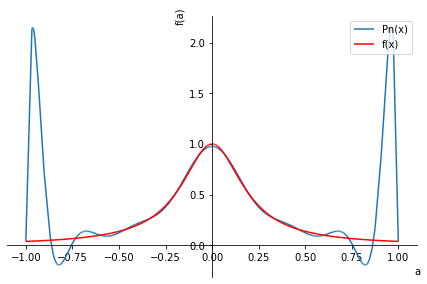




********** NUMBER OF POINTS =  32  **********

Lagrange=  -0.000350810354575515*a**31 - 123058455.589508*a**30 - 0.00289512053132057*a**29 + 703576795.766427*a**28 - 0.0408562272787094*a**27 - 1788592363.14164*a**26 + 0.282629620283842*a**25 + 2672415090.9802*a**24 + 0.689714469015598*a**23 - 2614619081.99879*a**22 + 0.108837336301804*a**21 + 1767065394.42412*a**20 + 0.142158216796815*a**19 - 848618143.559361*a**18 + 0.169539250666276*a**17 + 293661587.261306*a**16 + 0.0869445243733935*a**15 - 73571274.0385432*a**14 + 0.00191259899293073*a**13 + 13325485.9590487*a**12 + 0.000411670130688435*a**11 - 1737177.90228457*a**10 + 1.91733090275648e-5*a**9 + 162658.186066307*a**8 - 1.41854108015593e-7*a**7 - 11065.1446542337*a**6 - 4.02393459525419e-9*a**5 + 572.228665877957*a**4 - 1.67452654932336e-11*a**3 - 24.7440243155394*a**2 + 1.9844751321175e-14*a + 0.999785897513214


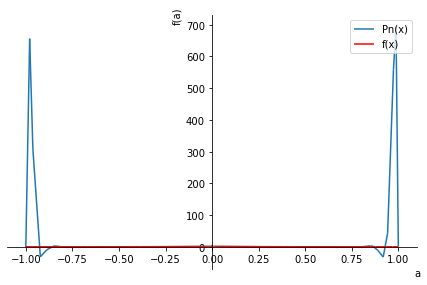

In [9]:
n=[8,16,32]

for npoints in n:
    print('********** NUMBER OF POINTS = ',npoints,' **********')
    print()
    x=list(np.linspace(-1,1,npoints))
    y=[(1/(1+25*(i**2))) for i in x]
    
    print('Lagrange= ',Lagrange(x,y))
    
    p=plot(Lagrange(x,y), (1/(1+25*(a**2))),(a,-1,1),show=False)
    p[1].line_color='r'
    p[0].label='Pn(x)'
    p[1].label='f(x)'
    p.legend=True
    p.show()
    
    print('\n\n')
    

#### c)	Do the same as in b, but use the roots of the Chebychev polynomial Tn+1(x) as interpolation points. Compare results with those obtained in (b).

********** NUMBER OF POINTS =  8  **********
Chebyshev roots=  [0.9807852804032304, 0.8314696123025452, 0.5555702330196023, 0.19509032201612833, -0.1950903220161282, -0.555570233019602, -0.8314696123025453, -0.9807852804032304]

Lagrange=  5.74540415243519e-15*a**7 - 2.00571025710197*a**6 - 7.32747196252603e-15*a**5 + 4.09164892448801*a**4 + 2.44942954807925e-15*a**3 - 2.67080377835698*a**2 - 2.81892564846231e-16*a + 0.608259715409772


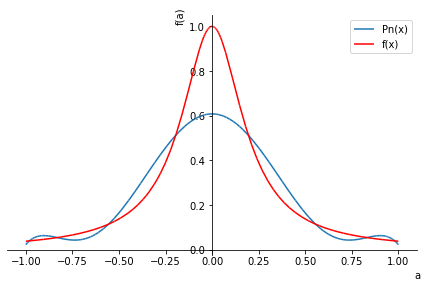




********** NUMBER OF POINTS =  16  **********
Chebyshev roots=  [0.9951847266721969, 0.9569403357322088, 0.881921264348355, 0.773010453362737, 0.6343932841636455, 0.4713967368259978, 0.29028467725446233, 0.09801714032956077, -0.09801714032956065, -0.29028467725446216, -0.4713967368259977, -0.6343932841636454, -0.773010453362737, -0.8819212643483549, -0.9569403357322088, -0.9951847266721968]

Lagrange=  6.74127420552395e-13*a**15 - 108.930069672423*a**14 - 3.5633718198369e-12*a**13 + 440.077481476599*a**12 - 9.8943075954594e-12*a**11 - 725.648552129724*a**10 - 5.55129275880972e-11*a**9 + 628.141325283541*a**8 + 1.88062898587305e-11*a**7 - 305.960988885558*a**6 + 2.44615439015661e-12*a**5 + 83.7237977779505*a**4 + 1.61905211459867e-13*a**3 - 12.2846216889339*a**2 + 1.12632342688657e-15*a + 0.916892952215254


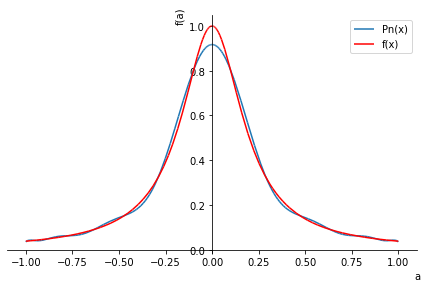




********** NUMBER OF POINTS =  32  **********
Chebyshev roots=  [0.9987954562051724, 0.989176509964781, 0.970031253194544, 0.9415440651830208, 0.9039892931234433, 0.8577286100002721, 0.8032075314806449, 0.7409511253549592, 0.6715589548470183, 0.5956993044924335, 0.5141027441932217, 0.4275550934302822, 0.33688985339222005, 0.24298017990326398, 0.14673047445536175, 0.049067674327418126, -0.04906767432741801, -0.14673047445536164, -0.24298017990326387, -0.33688985339221994, -0.42755509343028186, -0.5141027441932216, -0.5956993044924334, -0.6715589548470184, -0.7409511253549589, -0.8032075314806448, -0.857728610000272, -0.9039892931234433, -0.9415440651830207, -0.970031253194544, -0.989176509964781, -0.9987954562051724]

Lagrange=  8.83301254361868e-9*a**31 - 297671.979615825*a**30 - 7.7439472079277e-7*a**29 + 2393282.71610948*a**28 + 2.97520309686661e-5*a**27 - 8728218.71750592*a**26 - 0.000106708146631718*a**25 + 19102463.4646776*a**24 - 0.000323033891618252*a**23 - 27973177.923726*a*

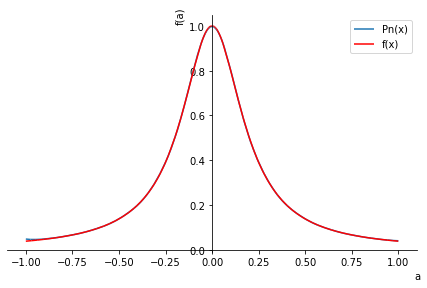

In [10]:
for npoints in n:
    print('********** NUMBER OF POINTS = ',npoints,' **********')
    x = [math.cos(((math.pi/2)*(2*j+1))/npoints) for j in range(npoints)]
    print('Chebyshev roots= ',x)
    print()
    y=[(1/(1+25*(i**2))) for i in x]
    
    print('Lagrange= ',Lagrange(x,y))
    
    p=plot(Lagrange(x,y), (1/(1+25*(a**2))),(a,-1,1),show=False)
    p[1].line_color='r'
    p[0].label='Pn(x)'
    p[1].label='f(x)'
    p.legend=True
    p.show()
    
    print('\n\n')

### Comparing errors

********** NUMBER OF POINTS =  8  **********
Chebyshev roots=  [0.9807852804032304, 0.8314696123025452, 0.5555702330196023, 0.19509032201612833, -0.1950903220161282, -0.555570233019602, -0.8314696123025453, -0.9807852804032304]

Lagrange=  5.74540415243519e-15*a**7 - 2.00571025710197*a**6 - 7.32747196252603e-15*a**5 + 4.09164892448801*a**4 + 2.44942954807925e-15*a**3 - 2.67080377835698*a**2 - 2.81892564846231e-16*a + 0.608259715409772


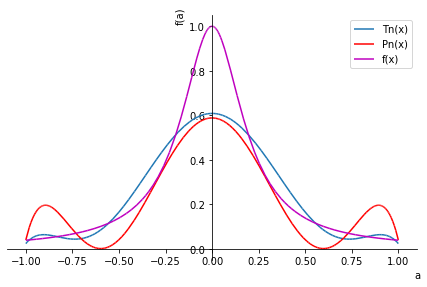




********** NUMBER OF POINTS =  16  **********
Chebyshev roots=  [0.9951847266721969, 0.9569403357322088, 0.881921264348355, 0.773010453362737, 0.6343932841636455, 0.4713967368259978, 0.29028467725446233, 0.09801714032956077, -0.09801714032956065, -0.29028467725446216, -0.4713967368259977, -0.6343932841636454, -0.773010453362737, -0.8819212643483549, -0.9569403357322088, -0.9951847266721968]

Lagrange=  6.74127420552395e-13*a**15 - 108.930069672423*a**14 - 3.5633718198369e-12*a**13 + 440.077481476599*a**12 - 9.8943075954594e-12*a**11 - 725.648552129724*a**10 - 5.55129275880972e-11*a**9 + 628.141325283541*a**8 + 1.88062898587305e-11*a**7 - 305.960988885558*a**6 + 2.44615439015661e-12*a**5 + 83.7237977779505*a**4 + 1.61905211459867e-13*a**3 - 12.2846216889339*a**2 + 1.12632342688657e-15*a + 0.916892952215254


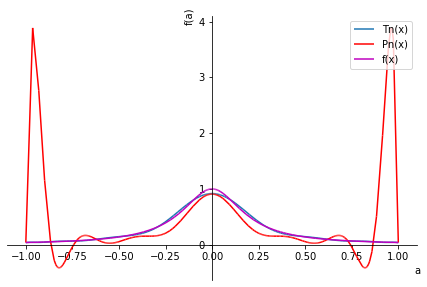




********** NUMBER OF POINTS =  32  **********
Chebyshev roots=  [0.9987954562051724, 0.989176509964781, 0.970031253194544, 0.9415440651830208, 0.9039892931234433, 0.8577286100002721, 0.8032075314806449, 0.7409511253549592, 0.6715589548470183, 0.5956993044924335, 0.5141027441932217, 0.4275550934302822, 0.33688985339222005, 0.24298017990326398, 0.14673047445536175, 0.049067674327418126, -0.04906767432741801, -0.14673047445536164, -0.24298017990326387, -0.33688985339221994, -0.42755509343028186, -0.5141027441932216, -0.5956993044924334, -0.6715589548470184, -0.7409511253549589, -0.8032075314806448, -0.857728610000272, -0.9039892931234433, -0.9415440651830207, -0.970031253194544, -0.989176509964781, -0.9987954562051724]

Lagrange=  8.83301254361868e-9*a**31 - 297671.979615825*a**30 - 7.7439472079277e-7*a**29 + 2393282.71610948*a**28 + 2.97520309686661e-5*a**27 - 8728218.71750592*a**26 - 0.000106708146631718*a**25 + 19102463.4646776*a**24 - 0.000323033891618252*a**23 - 27973177.923726*a*

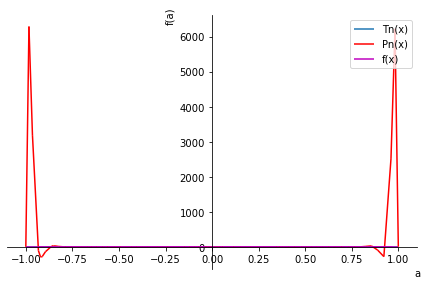

In [11]:
for npoints in n:
    print('********** NUMBER OF POINTS = ',npoints,' **********')
    x = [math.cos(((math.pi/2)*(2*j+1))/npoints) for j in range(npoints)]
    print('Chebyshev roots= ',x)
    print()
    x1=list(np.linspace(-1,1,npoints))
    y=[(1/(1+25*(i**2))) for i in x]
    
    print('Lagrange= ',Lagrange(x,y))
    
    p=plot(Lagrange(x,y),Lagrange(x1,y), (1/(1+25*(a**2))),(a,-1,1),show=False)
    p[1].line_color='r'
    p[2].line_color='m'
    p[1].label='Pn(x)'
    p[0].label='Tn(x)'
    p[2].label='f(x)'
    p.legend=True
    p.show()
    
    print('\n\n')

# The plots above show that using the Chebyshev roots provide a much smaller error when doing Lagragian interpolation as opposed to using equally spaced points in a given range.